In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

'/content/gdrive'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/content/gdrive/MyDrive/Dataset1'):
        print(dirname)

/content/gdrive/MyDrive/Dataset1
/content/gdrive/MyDrive/Dataset1/TEST
/content/gdrive/MyDrive/Dataset1/TEST/O
/content/gdrive/MyDrive/Dataset1/TEST/R
/content/gdrive/MyDrive/Dataset1/TRAIN
/content/gdrive/MyDrive/Dataset1/TRAIN/R
/content/gdrive/MyDrive/Dataset1/TRAIN/O


In [ ]:
train_path = "/content/gdrive/MyDrive/Dataset1/TRAIN"
test_path = "/content/gdrive/MyDrive/Dataset1/TEST"

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 800/800 [00:13<00:00, 60.12it/s] 


In [ ]:
data.shape

(1600, 2)

In [ ]:
from collections import Counter # นับจำนวน
Counter(y_data)

Counter({'R': 800, 'O': 800})

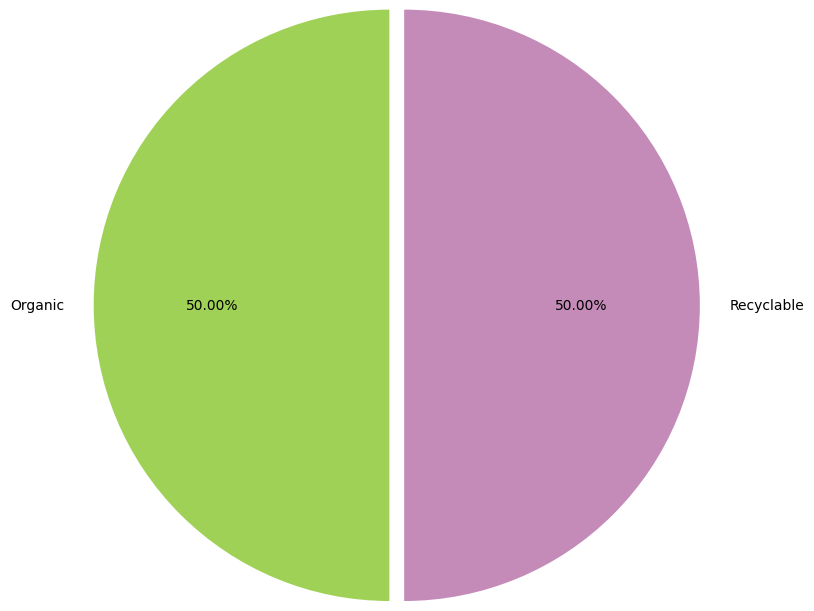

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

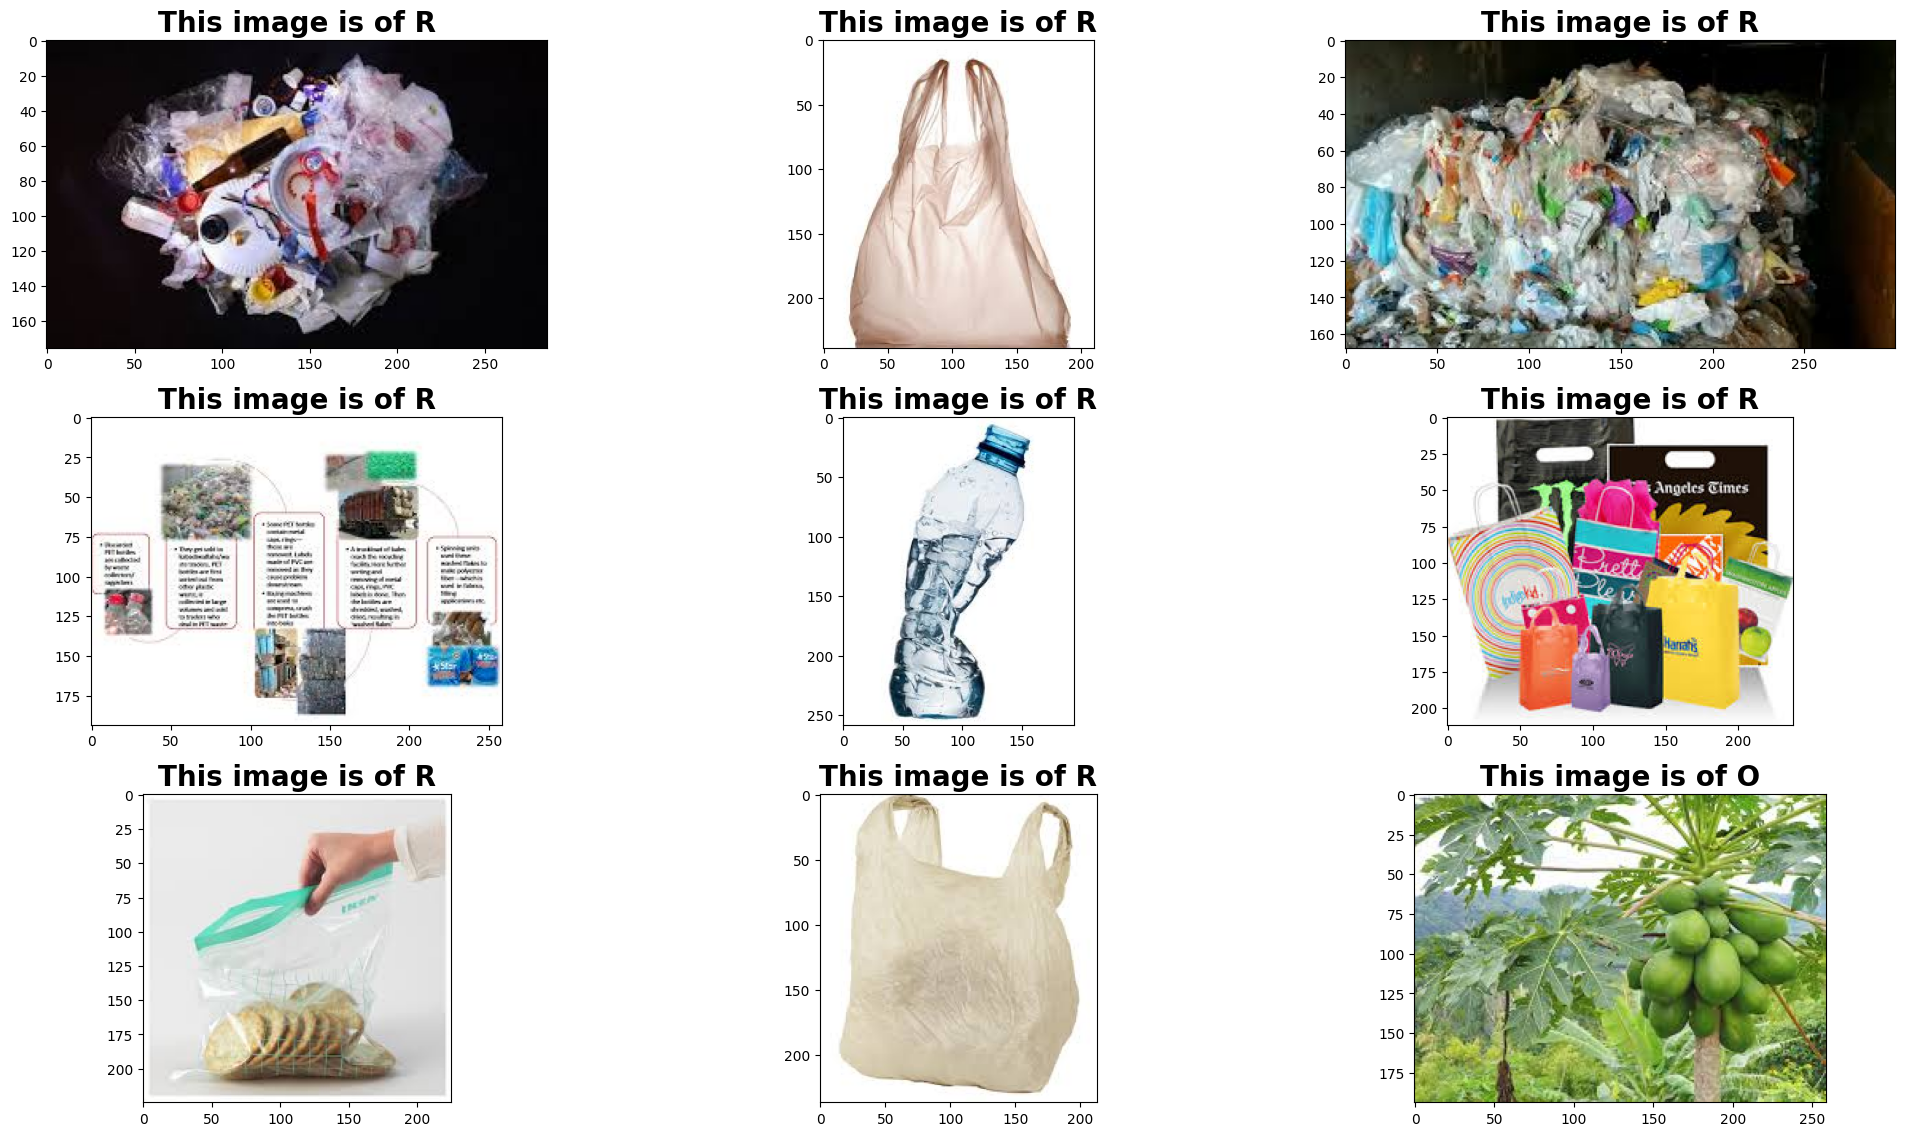

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(1500)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


##CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [ ]:
model

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255) # ปรับค่าสี

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)# ปรับค่าสี

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 1600 images belonging to 2 classes.
Found 409 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
7/7 [==============================] - 491s 76s/step - loss: 0.8671 - accuracy: 0.5075 - val_loss: 0.6071 - val_accuracy: 0.5208
Epoch 2/10
7/7 [==============================] - 208s 29s/step - loss: 0.5487 - accuracy: 0.7456 - val_loss: 0.2358 - val_accuracy: 0.9267
Epoch 3/10
7/7 [==============================] - 203s 29s/step - loss: 0.4439 - accuracy: 0.8206 - val_loss: 0.2504 - val_accuracy: 0.9413
Epoch 4/10
7/7 [==============================] - 203s 29s/step - loss: 0.4096 - accuracy: 0.8537 - val_loss: 0.2008 - val_accuracy: 0.9413
Epoch 5/10
7/7 [==============================] - 211s 29s/step - loss: 0.3658 - accuracy: 0.8650 - val_loss: 0.2067 - val_accuracy: 0.9364
Epoch 6/10
7/7 [==============================] - 206s 29s/step - loss: 0.3663 - accuracy: 0.8750 - val_loss: 0.1925 - val_accuracy: 0.9413
Epoch 7/10
7/7 [==============================] - 203s 29s/step - loss: 0.3308 - accuracy: 0.8881 - val_loss: 0.1804 - val_accuracy: 0.9462
Epoch 8/10
7/7 [====

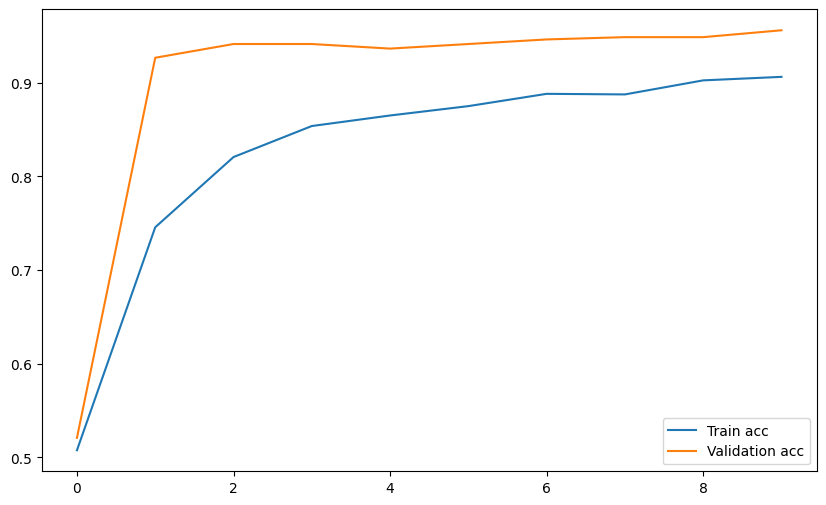

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

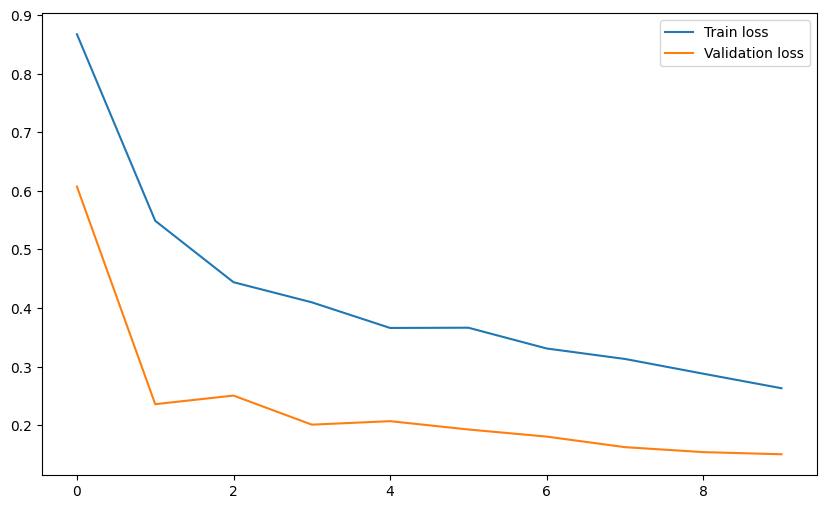

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 127ms/step
This image -> Recyclable


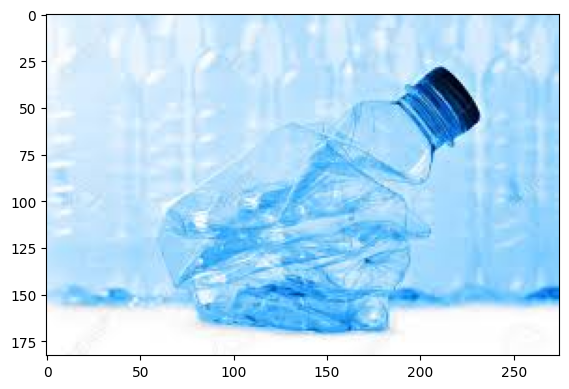

In [ ]:
test_img = cv2.imread("/content/gdrive/MyDrive/Dataset1/TRAIN/R/R_148.jpg")
predict_func(test_img)

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 11.4 MB/s eta 0:00:00


In [ ]:
import visualkeras

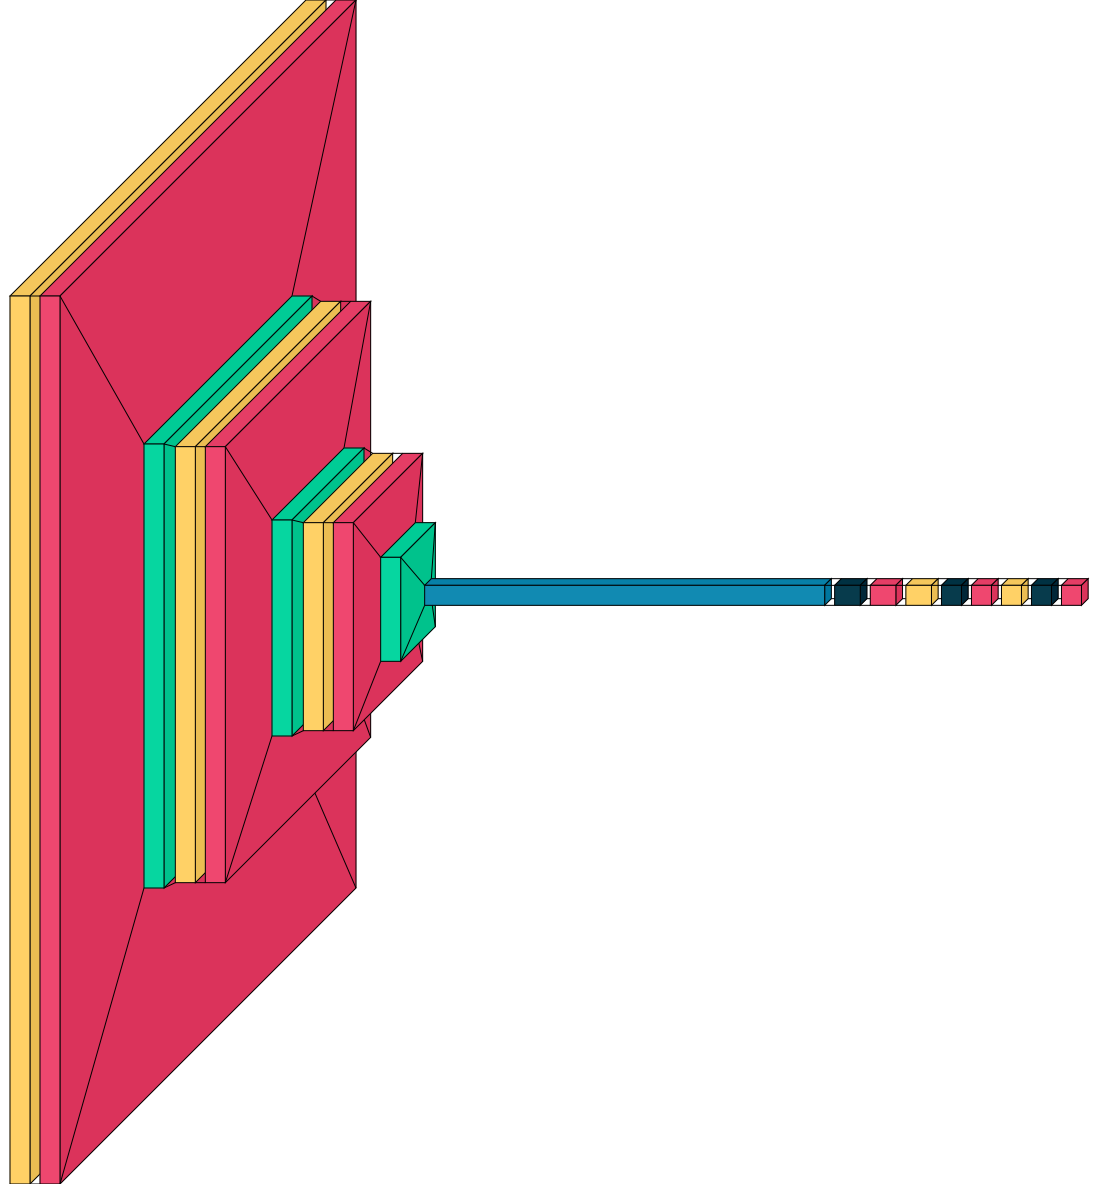

In [ ]:
visualkeras.layered_view(model)